In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from astropy.time import Time, TimezoneInfo
import astropy.units as u
EST = TimezoneInfo(-4 * u.hour)

import datetime as dt

# Set seaborn style for better looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
# Load the files data
files = pd.read_csv('/datax/scratch/andresl/pipeline-runs/all-bands/full-run-60k/files.csv', index_col='file')
files = files[files['num_hits'] >= 0]
print(f"Loaded {len(files)} files")
files.head()

Loaded 60031 files


,num_hits,time_completed,RA,DEC,tstart,nchans,foff,fch1,flch
file,,,,,,,,,
/datag/pipeline/AGBT24B_999_21/blc04_blp04/blc04_guppi_60652_09060_DYSON5_0039.rawspec.0000.h5,0,2025-08-03T06:49:30.027120+00:00,4.035467,-10.9115,60652.104861,67108864.0,-0.000003,11626.464844,11438.964844
/datag/pipeline/AGBT22B_999_41/blc02_blp02/blc02_guppi_60054_82497_HIP60604_0027.rawspec.0000.h5,0,2025-08-03T06:49:30.755366+00:00,12.424133,13.1221,60054.954826,67108864.0,-0.000003,12001.464844,11813.964844
/datag/pipeline/AGBT24A_999_07/blc06_blp06/blc06_guppi_60384_19568_TIC235684964_0088.rawspec.0000.h5,87,2025-08-03T06:49:44.751474+00:00,19.220073,76.1255,60384.226481,67108864.0,-0.000003,1126.464844,938.964844
/datag/pipeline/AGBT24A_999_20/blc20_blp10/blc20_guppi_60415_72432_HIP112850_0129.rawspec.0000.h5,34,2025-08-03T06:49:48.961125+00:00,22.853027,48.7344,60415.838333,67108864.0,-0.000003,11251.464844,11063.964844
/datag/pipeline/AGBT23B_999_38/blc61_blp21/blc61_guppi_60349_01151_TIC306338882_0031.rawspec.0000.h5,8,2025-08-03T06:49:49.295092+00:00,0.940100,-14.7890,60349.013322,67108864.0,-0.000003,9938.964844,9751.464844


In [3]:
files['num_hits'].sum()

np.int64(87261859)

Text(0, 0.5, 'Number of Files')

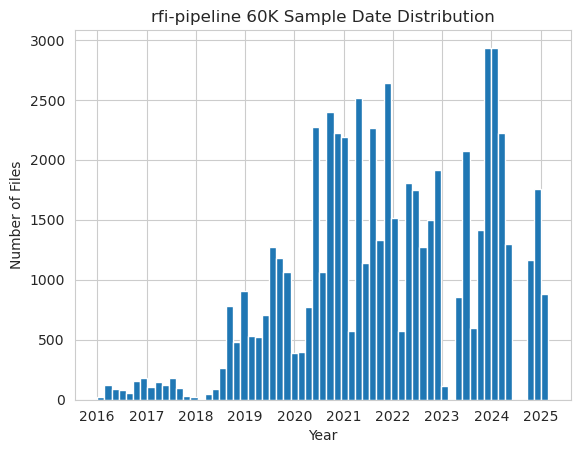

In [20]:
counts, bins, _ = plt.hist(Time(files['tstart'], format='mjd').to_datetime(EST), bins='auto')
plt.title('rfi-pipeline 60K Sample Date Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Files')

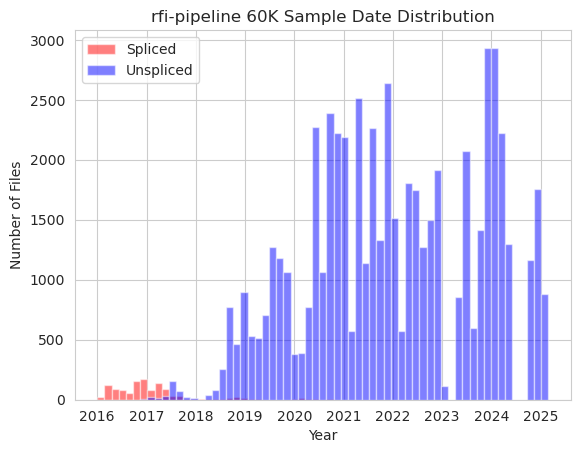

In [32]:
spliced_mask = files.index.str.contains('spliced')
plt.hist(Time(files.loc[spliced_mask, 'tstart'], format='mjd').to_datetime(EST), bins=bins, color='red', alpha=0.5, label='Spliced')
plt.hist(Time(files.loc[~spliced_mask, 'tstart'], format='mjd').to_datetime(EST), bins=bins, color='blue', alpha=0.5, label='Unspliced')
plt.title('rfi-pipeline 60K Sample Date Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Files')
plt.legend(loc='upper left')

In [33]:
Time(files.loc[spliced_mask, 'tstart'], format='mjd').unix

array([1.49884652e+09, 1.48709644e+09, 1.47670295e+09, ...,
       1.45611881e+09, 1.47950111e+09, 1.53942757e+09], shape=(1197,))

Text(0, 0.5, 'Number of Files')

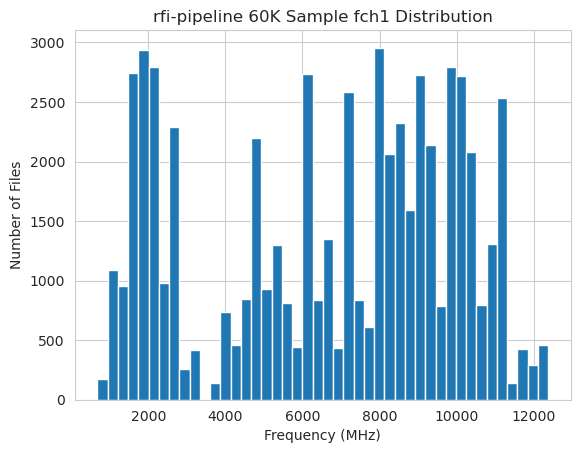

In [20]:
plt.hist(files['fch1'], bins='auto')
plt.title('rfi-pipeline 60K Sample fch1 Distribution')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Number of Files')

In [ ]:
Time(files.loc[files.index.str.contains('spliced'), 'tstart'].Zmax(), format='mjd').to_datetime(EST)

datetime.datetime(2021, 2, 11, 23, 10, 51, tzinfo=<astropy.time.formats.TimezoneInfo object at 0x7c9e99a6ca50>)

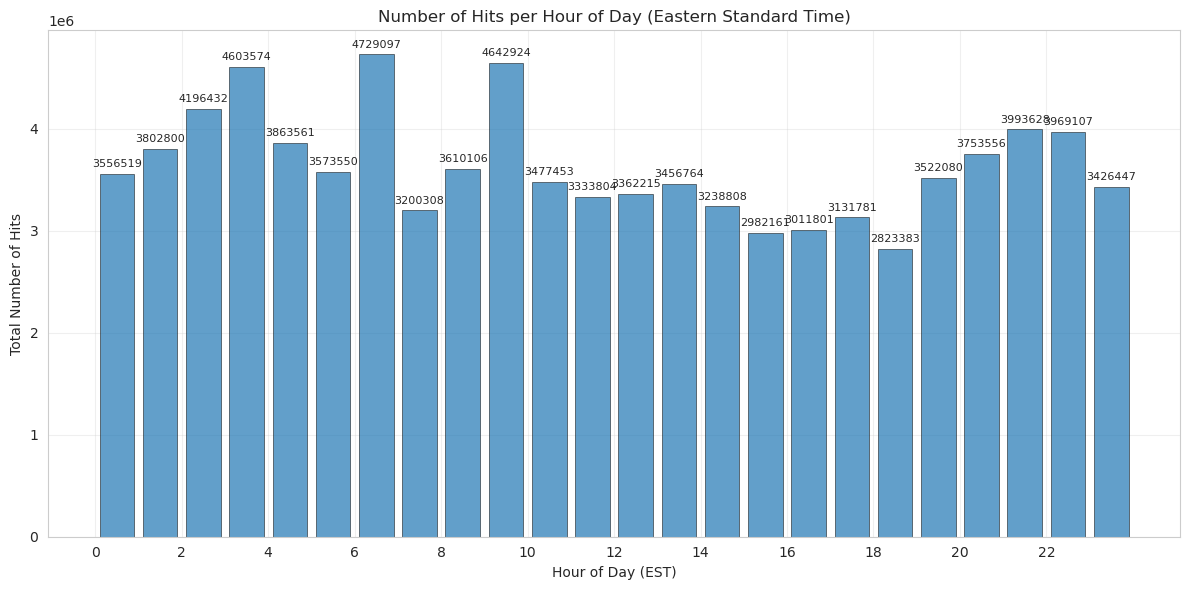

Total hits across all hours: 87261859
Peak hour: 6:00 EST with 4729097 hits


In [9]:
# Convert MJD to hour of day (0-24) in EST (UTC-5)
def mjd_to_hour_of_day(mjd):
    """Convert MJD to hour of day (0-24) in EST (UTC-5)"""
    fractional_day = mjd % 1.0
    utc_hour = fractional_day * 24.0
    # Convert UTC to EST (subtract 5 hours)
    est_hour = (utc_hour - 5.0) % 24.0
    return est_hour

files['hour_of_day'] = files['tstart'].apply(mjd_to_hour_of_day)

# Create bins for hours (0-24)
hour_bins = np.arange(0, 25, 1)  # 24 hourly bins
hour_centers = (hour_bins[:-1] + hour_bins[1:]) / 2

# Calculate total hits per hour bin
hits_per_hour, _ = np.histogram(files['hour_of_day'], bins=hour_bins, weights=files['num_hits'])

# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(hour_centers, hits_per_hour, width=0.8, alpha=0.7, edgecolor='black', linewidth=0.5)

# Formatting
plt.xlabel('Hour of Day (EST)')
plt.ylabel('Total Number of Hits')
plt.title('Number of Hits per Hour of Day (Eastern Standard Time)')
plt.xticks(range(0, 24, 2))  # Show every 2 hours
plt.grid(True, alpha=0.3)

# Add value labels on top of bars for readability
for i, (bar, value) in enumerate(zip(bars, hits_per_hour)):
    if value > 0:  # Only show labels for non-zero bars
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(hits_per_hour)*0.01, 
                f'{int(value)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print(f"Total hits across all hours: {hits_per_hour.sum()}")
print(f"Peak hour: {hour_centers[np.argmax(hits_per_hour)]:.0f}:00 EST with {hits_per_hour.max():.0f} hits")

In [38]:
files[~files.index.str.contains('spliced')].groupby('tstart').size().value_counts()

1     14611
2      7948
3      4280
4      1995
5       855
6       314
7       117
8        31
9        12
10        9
11        4
13        1
14        1
12        1
Name: count, dtype: int64

Using 56,343 observations with 87,261,859 total hits for weighted KDE


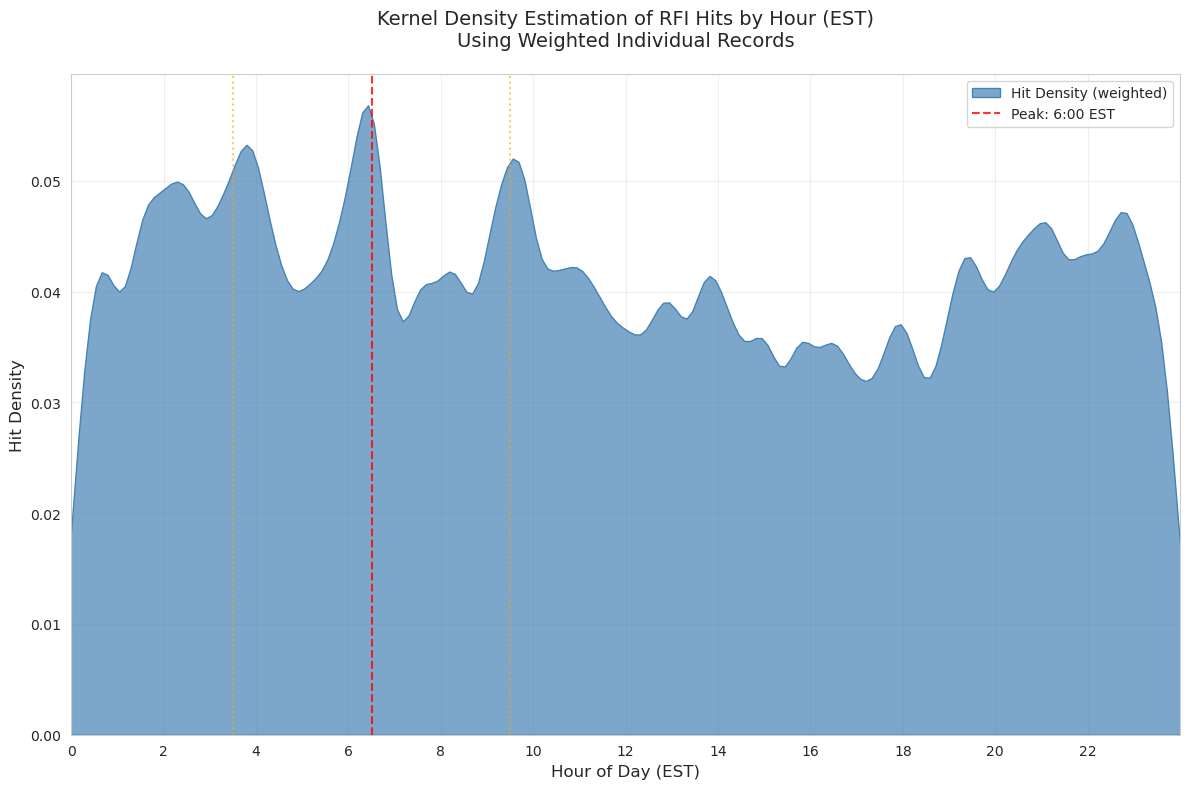

KDE analysis shows peak RFI activity around 6:00 EST
Weighted mean hour of hits: 11.6
Standard deviation: 7.0


In [10]:
# KDE version using actual individual hour data with weights
plt.figure(figsize=(12, 8))

# Use the actual hour_of_day values with weights (num_hits)
hit_data = files[files['num_hits'] > 0]
hours_data = hit_data['hour_of_day'].values
weights_data = hit_data['num_hits'].values

print(f"Using {len(hours_data):,} observations with {weights_data.sum():,} total hits for weighted KDE")

# Create weighted KDE plot
sns.kdeplot(x=hours_data, weights=weights_data, bw_adjust=0.2, alpha=0.7, fill=True, 
            color='steelblue', label='Hit Density (weighted)')

# Add vertical lines for peak hours (using binned data for reference)
peak_hour = hour_centers[np.argmax(hits_per_hour)]
plt.axvline(x=peak_hour, color='red', linestyle='--', alpha=0.8, 
            label=f'Peak: {peak_hour:.0f}:00 EST')

# Mark other high-activity hours
top_hours = np.argsort(hits_per_hour)[-3:]  # Top 3 hours
for idx in top_hours[:-1]:  # Exclude the peak (already marked)
    if hits_per_hour[idx] > 0:
        plt.axvline(x=hour_centers[idx], color='orange', linestyle=':', alpha=0.6)

plt.xlabel('Hour of Day (EST)', fontsize=12)
plt.ylabel('Hit Density', fontsize=12)
plt.title('Kernel Density Estimation of RFI Hits by Hour (EST)\nUsing Weighted Individual Records', fontsize=14, pad=20)
plt.xlim(0, 24)
plt.xticks(range(0, 24, 2))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"KDE analysis shows peak RFI activity around {peak_hour:.0f}:00 EST")
print(f"Weighted mean hour of hits: {np.average(hours_data, weights=weights_data):.1f}")
print(f"Standard deviation: {np.sqrt(np.average((hours_data - np.average(hours_data, weights=weights_data))**2, weights=weights_data)):.1f}")

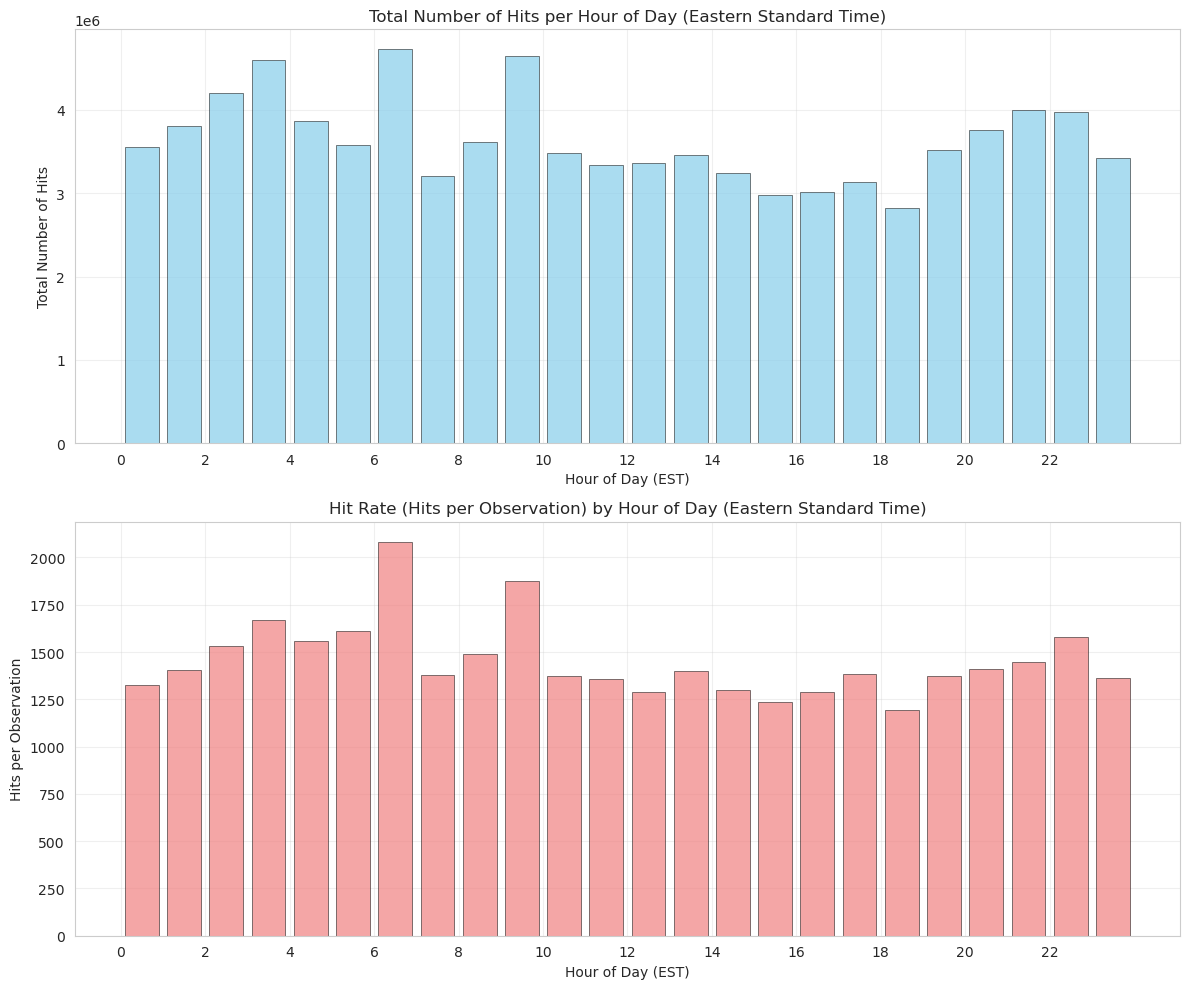

Hour with most total hits: 6:00 EST (4729097 hits)
Hour with highest hit rate: 6:00 EST (2084.22 hits/obs)
Hour with most observations: 4:00 EST (2755 observations)

Observations per hour (EST):
 0:00 EST - 2681 obs, 3556519 hits, 1326.56 hits/obs
 2:00 EST - 2706 obs, 3802800 hits, 1405.32 hits/obs
 2:00 EST - 2735 obs, 4196432 hits, 1534.34 hits/obs
 4:00 EST - 2755 obs, 4603574 hits, 1670.99 hits/obs
 4:00 EST - 2477 obs, 3863561 hits, 1559.77 hits/obs
 6:00 EST - 2221 obs, 3573550 hits, 1608.98 hits/obs
 6:00 EST - 2269 obs, 4729097 hits, 2084.22 hits/obs
 8:00 EST - 2325 obs, 3200308 hits, 1376.48 hits/obs
 8:00 EST - 2421 obs, 3610106 hits, 1491.16 hits/obs
10:00 EST - 2476 obs, 4642924 hits, 1875.17 hits/obs
10:00 EST - 2529 obs, 3477453 hits, 1375.03 hits/obs
12:00 EST - 2456 obs, 3333804 hits, 1357.41 hits/obs
12:00 EST - 2614 obs, 3362215 hits, 1286.23 hits/obs
14:00 EST - 2467 obs, 3456764 hits, 1401.20 hits/obs
14:00 EST - 2493 obs, 3238808 hits, 1299.16 hits/obs
16:00 EST 

In [11]:
# Also create a plot showing hit rate (hits per observation) by hour
observations_per_hour, _ = np.histogram(files['hour_of_day'], bins=hour_bins)
hit_rate_per_hour = np.divide(hits_per_hour, observations_per_hour, 
                             out=np.zeros_like(hits_per_hour, dtype=float), 
                             where=observations_per_hour!=0)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Top plot: Total hits per hour
bars1 = ax1.bar(hour_centers, hits_per_hour, width=0.8, alpha=0.7, 
                color='skyblue', edgecolor='black', linewidth=0.5)
ax1.set_xlabel('Hour of Day (EST)')
ax1.set_ylabel('Total Number of Hits')
ax1.set_title('Total Number of Hits per Hour of Day (Eastern Standard Time)')
ax1.set_xticks(range(0, 24, 2))
ax1.grid(True, alpha=0.3)

# Bottom plot: Hit rate per hour
bars2 = ax2.bar(hour_centers, hit_rate_per_hour, width=0.8, alpha=0.7, 
                color='lightcoral', edgecolor='black', linewidth=0.5)
ax2.set_xlabel('Hour of Day (EST)')
ax2.set_ylabel('Hits per Observation')
ax2.set_title('Hit Rate (Hits per Observation) by Hour of Day (Eastern Standard Time)')
ax2.set_xticks(range(0, 24, 2))
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Hour with most total hits: {hour_centers[np.argmax(hits_per_hour)]:.0f}:00 EST ({hits_per_hour.max():.0f} hits)")
print(f"Hour with highest hit rate: {hour_centers[np.argmax(hit_rate_per_hour)]:.0f}:00 EST ({hit_rate_per_hour.max():.2f} hits/obs)")
print(f"Hour with most observations: {hour_centers[np.argmax(observations_per_hour)]:.0f}:00 EST ({observations_per_hour.max()} observations)")

# Show distribution of observations by hour
print("\nObservations per hour (EST):")
for i, (hour, obs_count, hit_count, rate) in enumerate(zip(hour_centers, observations_per_hour, hits_per_hour, hit_rate_per_hour)):
    if obs_count > 0:
        print(f"{hour:2.0f}:00 EST - {obs_count:4d} obs, {hit_count:6.0f} hits, {rate:5.2f} hits/obs")

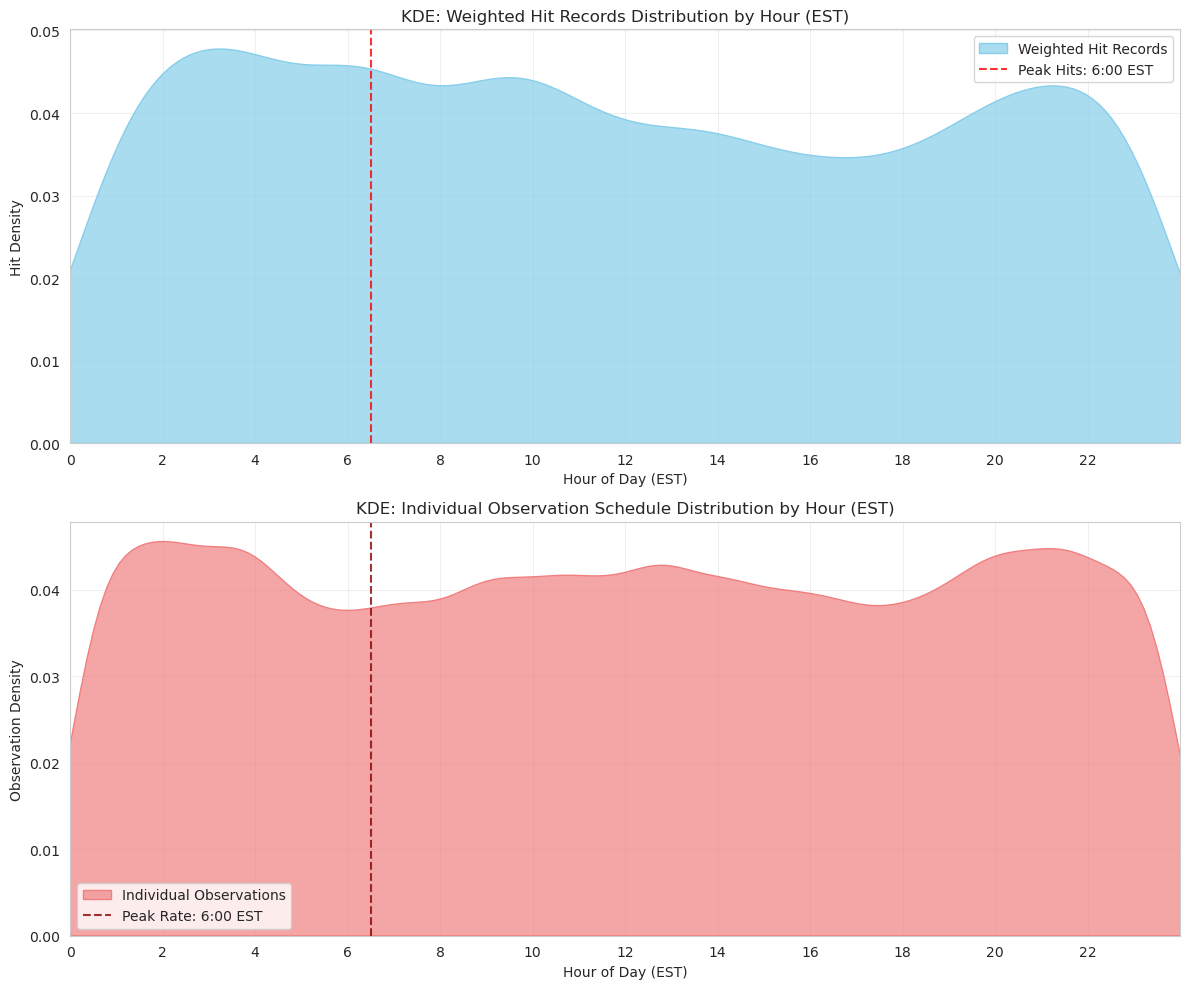

Top plot: KDE from 56,343 observations weighted by 87,261,859 hits
Bottom plot: KDE from 60,031 individual observations
Peak hit rate occurs at 6:00 EST
Observation schedule mean: 12.0 hours EST
Weighted hit records mean: 11.6 hours EST


In [12]:
# KDE version using weights - dual plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Top plot: KDE of weighted hit distribution
sns.kdeplot(x=hours_data, weights=weights_data, bw_adjust=0.8, alpha=0.7, fill=True, 
            color='skyblue', ax=ax1, label='Weighted Hit Records')
ax1.axvline(x=peak_hour, color='red', linestyle='--', alpha=0.8, 
            label=f'Peak Hits: {peak_hour:.0f}:00 EST')

ax1.set_xlabel('Hour of Day (EST)')
ax1.set_ylabel('Hit Density')
ax1.set_title('KDE: Weighted Hit Records Distribution by Hour (EST)')
ax1.set_xlim(0, 24)
ax1.set_xticks(range(0, 24, 2))
ax1.legend()
ax1.grid(True, alpha=0.3)

# Bottom plot: KDE of observation schedule (unweighted)
observation_hours = files['hour_of_day'].values
sns.kdeplot(x=observation_hours, bw_adjust=0.8, alpha=0.7, fill=True, 
            color='lightcoral', ax=ax2, label='Individual Observations')

# Mark peak hit rate hour
peak_rate_hour = hour_centers[np.argmax(hit_rate_per_hour)]
ax2.axvline(x=peak_rate_hour, color='darkred', linestyle='--', alpha=0.8, 
            label=f'Peak Rate: {peak_rate_hour:.0f}:00 EST')

ax2.set_xlabel('Hour of Day (EST)')
ax2.set_ylabel('Observation Density')
ax2.set_title('KDE: Individual Observation Schedule Distribution by Hour (EST)')
ax2.set_xlim(0, 24)
ax2.set_xticks(range(0, 24, 2))
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Top plot: KDE from {len(hours_data):,} observations weighted by {weights_data.sum():,} hits")
print(f"Bottom plot: KDE from {len(observation_hours):,} individual observations")
print(f"Peak hit rate occurs at {peak_rate_hour:.0f}:00 EST")
print(f"Observation schedule mean: {np.mean(observation_hours):.1f} hours EST")
print(f"Weighted hit records mean: {np.average(hours_data, weights=weights_data):.1f} hours EST")

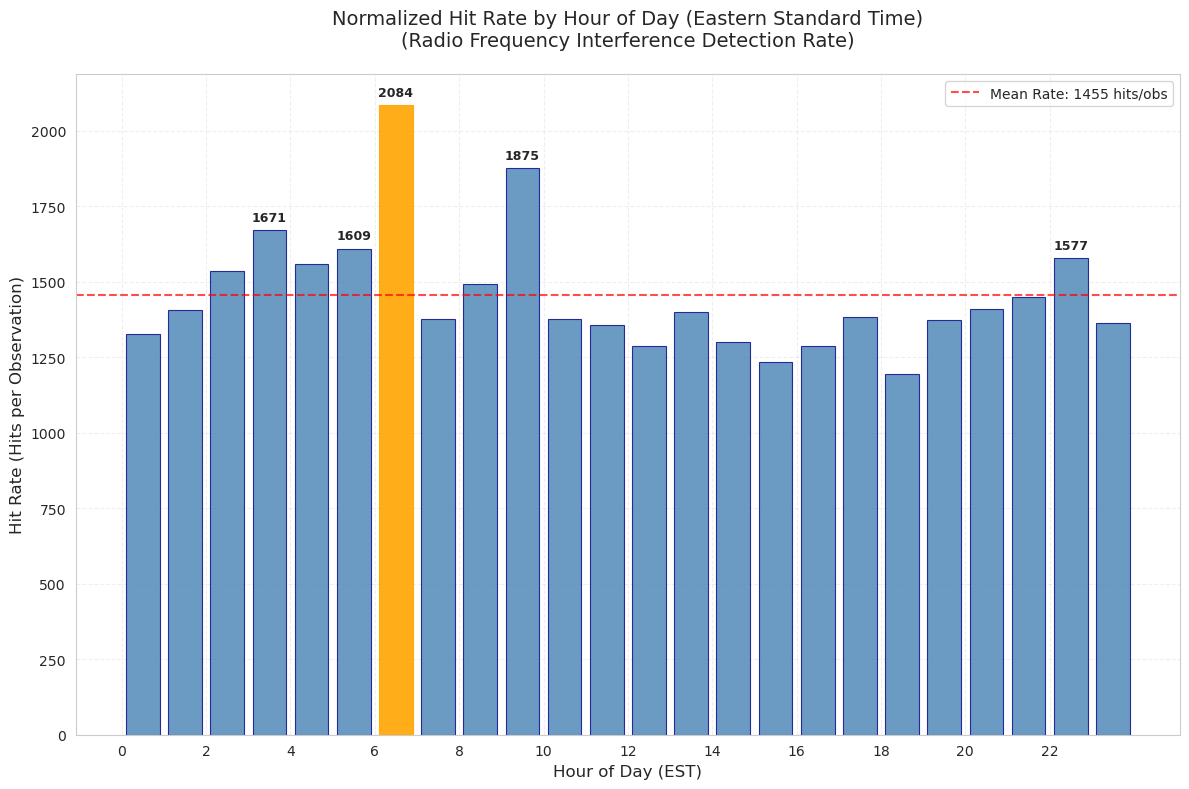

=== Normalized Hit Rate Analysis (EST) ===
Peak normalized rate: 2084.22 hits/observation at 6:00 EST
Mean normalized rate: 1454.95 hits/observation
Standard deviation: 198.04

Hours with above-average hit rates (8 hours) in EST:
   2:00 EST - 1534.34 hits/obs (+5.5% vs mean)
   4:00 EST - 1670.99 hits/obs (+14.8% vs mean)
   4:00 EST - 1559.77 hits/obs (+7.2% vs mean)
   6:00 EST - 1608.98 hits/obs (+10.6% vs mean)
   6:00 EST - 2084.22 hits/obs (+43.3% vs mean)
   8:00 EST - 1491.16 hits/obs (+2.5% vs mean)
  10:00 EST - 1875.17 hits/obs (+28.9% vs mean)
  22:00 EST - 1576.92 hits/obs (+8.4% vs mean)


In [13]:
# Create a focused normalized plot (hits per observation) similar to spatial.ipynb approach
plt.figure(figsize=(12, 8))

# Create the normalized bar plot
bars = plt.bar(hour_centers, hit_rate_per_hour, width=0.8, alpha=0.8, 
               color='steelblue', edgecolor='darkblue', linewidth=0.8)

# Formatting
plt.xlabel('Hour of Day (EST)', fontsize=12)
plt.ylabel('Hit Rate (Hits per Observation)', fontsize=12)
plt.title('Normalized Hit Rate by Hour of Day (Eastern Standard Time)\n(Radio Frequency Interference Detection Rate)', fontsize=14, pad=20)
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3, linestyle='--')

# Add value labels on top of bars for key hours
peak_indices = np.argsort(hit_rate_per_hour)[-5:]  # Top 5 hours
for idx in peak_indices:
    if hit_rate_per_hour[idx] > 0:
        plt.text(hour_centers[idx], hit_rate_per_hour[idx] + max(hit_rate_per_hour)*0.01, 
                f'{hit_rate_per_hour[idx]:.0f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)

# Add a horizontal line showing the mean hit rate
mean_rate = np.mean(hit_rate_per_hour[hit_rate_per_hour > 0])
plt.axhline(y=mean_rate, color='red', linestyle='--', alpha=0.7, 
           label=f'Mean Rate: {mean_rate:.0f} hits/obs')

# Highlight the peak hour
peak_hour_idx = np.argmax(hit_rate_per_hour)
bars[peak_hour_idx].set_color('orange')
bars[peak_hour_idx].set_alpha(0.9)

plt.legend()
plt.tight_layout()
plt.show()

# Additional statistics
print("=== Normalized Hit Rate Analysis (EST) ===")
print(f"Peak normalized rate: {hit_rate_per_hour.max():.2f} hits/observation at {hour_centers[peak_hour_idx]:.0f}:00 EST")
print(f"Mean normalized rate: {mean_rate:.2f} hits/observation")
print(f"Standard deviation: {np.std(hit_rate_per_hour[hit_rate_per_hour > 0]):.2f}")

# Find hours with above-average activity
above_avg_mask = hit_rate_per_hour > mean_rate
above_avg_hours = hour_centers[above_avg_mask]
print(f"\nHours with above-average hit rates ({len(above_avg_hours)} hours) in EST:")
for hour in sorted(above_avg_hours):
    rate = hit_rate_per_hour[int(hour)]
    print(f"  {hour:2.0f}:00 EST - {rate:.2f} hits/obs ({((rate/mean_rate-1)*100):+.1f}% vs mean)")

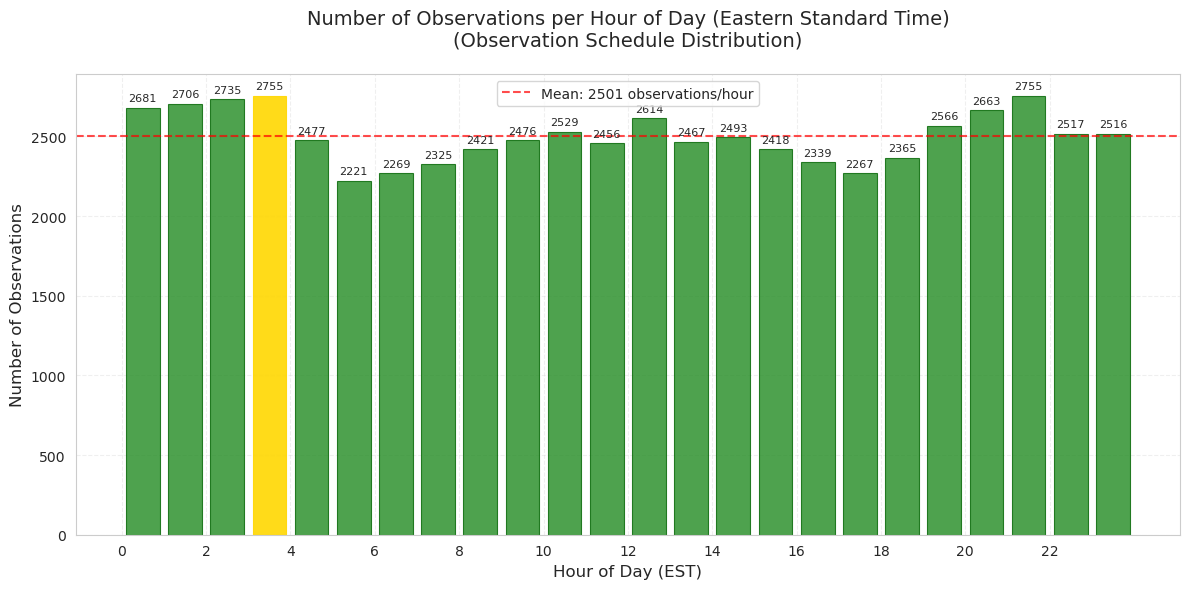

=== Observation Schedule Analysis (EST) ===
Total observations: 60031
Peak observation hour: 4:00 EST with 2755 observations
Mean observations per hour: 2501.3
Standard deviation: 155.9

Hours with most observations (EST):
   0:00 EST - 2681 observations
   2:00 EST - 2706 observations
   2:00 EST - 2735 observations
   4:00 EST - 2755 observations
  22:00 EST - 2755 observations

Hours with fewest observations (EST):
   6:00 EST - 2221 observations
  18:00 EST - 2267 observations
   6:00 EST - 2269 observations
   8:00 EST - 2325 observations
  16:00 EST - 2339 observations

All hours have at least some observations


In [16]:
# Create a plot showing number of observations per hour of day
plt.figure(figsize=(12, 6))

# Create the observations bar plot
bars = plt.bar(hour_centers, observations_per_hour, width=0.8, alpha=0.8, 
               color='forestgreen', edgecolor='darkgreen', linewidth=0.8)

# Formatting
plt.xlabel('Hour of Day (EST)', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)
plt.title('Number of Observations per Hour of Day (Eastern Standard Time)\n(Observation Schedule Distribution)', fontsize=14, pad=20)
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3, linestyle='--')

# Add value labels on top of bars for readability
for i, (bar, value) in enumerate(zip(bars, observations_per_hour)):
    if value > 0:  # Only show labels for non-zero bars
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(observations_per_hour)*0.01, 
                f'{int(value)}', ha='center', va='bottom', fontsize=8)

# Add a horizontal line showing the mean number of observations
mean_obs = np.mean(observations_per_hour[observations_per_hour > 0])
plt.axhline(y=mean_obs, color='red', linestyle='--', alpha=0.7, 
           label=f'Mean: {mean_obs:.0f} observations/hour')

# Highlight the peak observation hour
peak_obs_idx = np.argmax(observations_per_hour)
bars[peak_obs_idx].set_color('gold')
bars[peak_obs_idx].set_alpha(0.9)

plt.legend()
plt.tight_layout()
plt.show()

# Statistics for observations
print("=== Observation Schedule Analysis (EST) ===")
print(f"Total observations: {observations_per_hour.sum()}")
print(f"Peak observation hour: {hour_centers[peak_obs_idx]:.0f}:00 EST with {observations_per_hour.max()} observations")
print(f"Mean observations per hour: {mean_obs:.1f}")
print(f"Standard deviation: {np.std(observations_per_hour[observations_per_hour > 0]):.1f}")

# Find hours with most and least observations
sorted_indices = np.argsort(observations_per_hour)
print(f"\nHours with most observations (EST):")
for i in range(-5, 0):  # Top 5
    idx = sorted_indices[i]
    if observations_per_hour[idx] > 0:
        print(f"  {hour_centers[idx]:2.0f}:00 EST - {observations_per_hour[idx]:4d} observations")

print(f"\nHours with fewest observations (EST):")
for i in range(5):  # Bottom 5
    idx = sorted_indices[i]
    if observations_per_hour[idx] > 0:
        print(f"  {hour_centers[idx]:2.0f}:00 EST - {observations_per_hour[idx]:4d} observations")

# Check if there are any hours with no observations
zero_obs_hours = hour_centers[observations_per_hour == 0]
if len(zero_obs_hours) > 0:
    print(f"\nHours with no observations: {[f'{h:.0f}:00 EST' for h in zero_obs_hours]}")
else:
    print(f"\nAll hours have at least some observations")

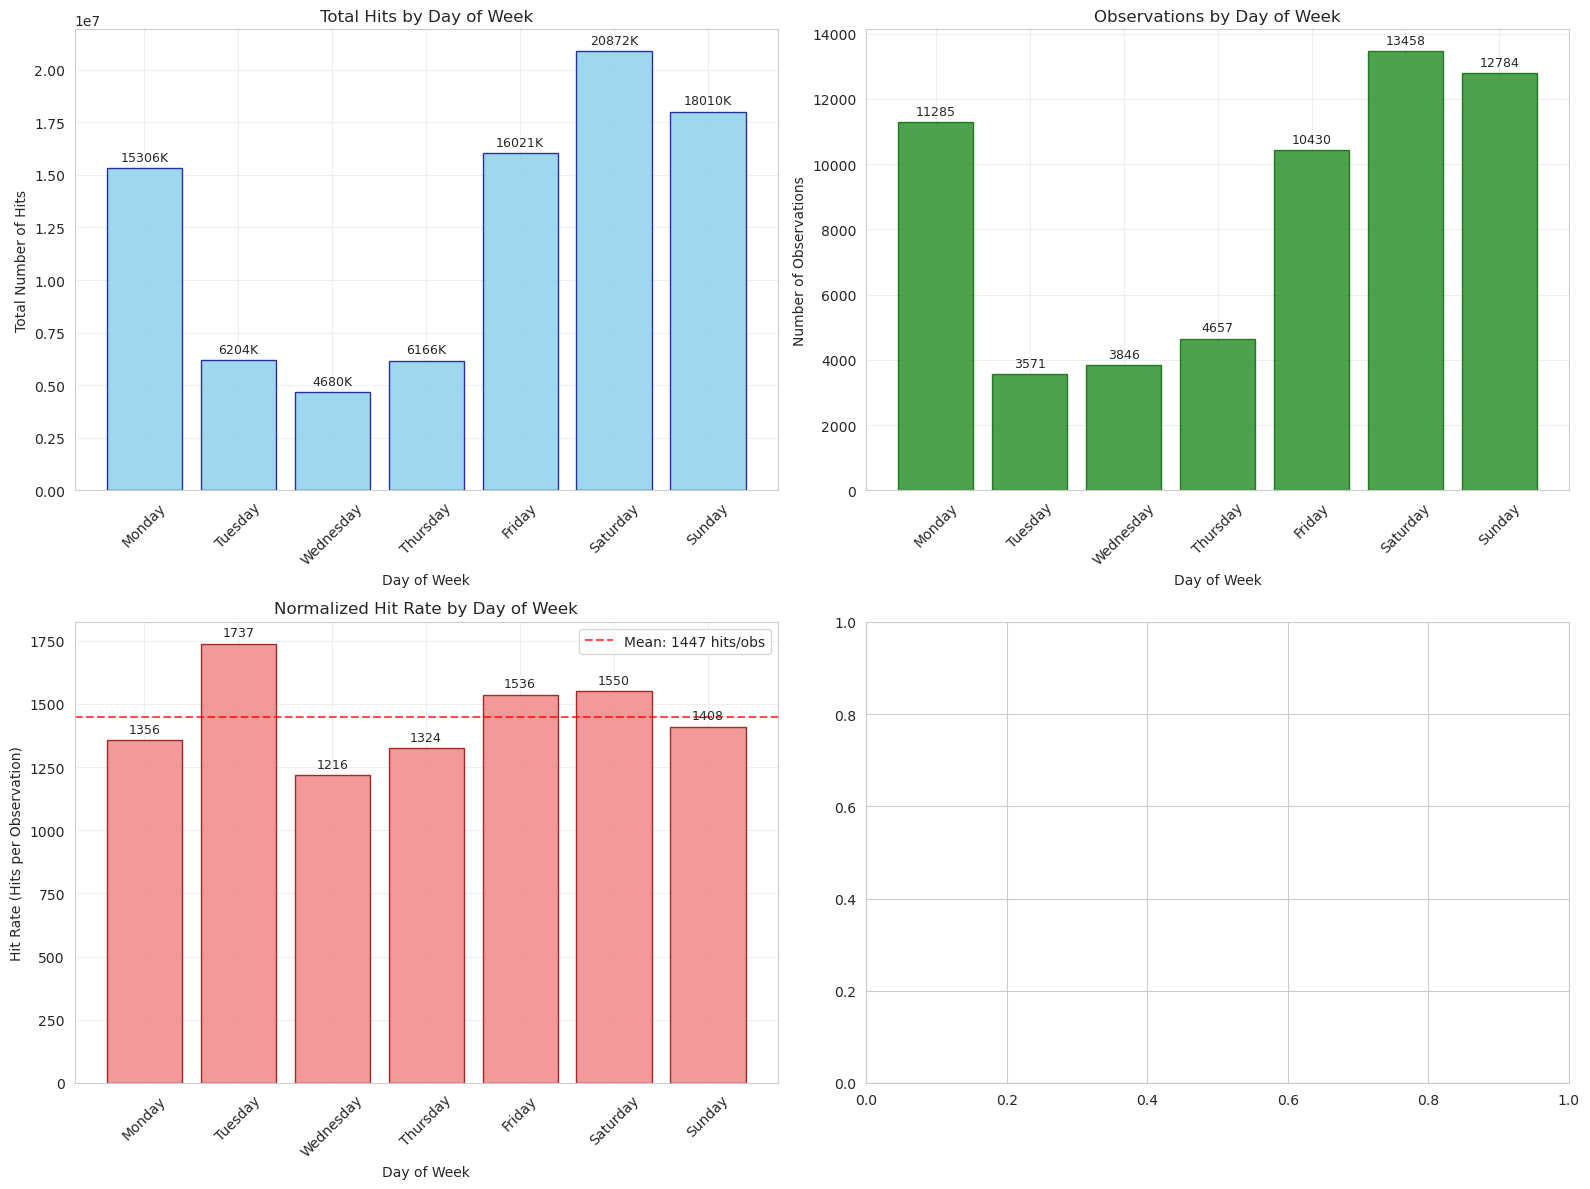

=== Day of Week Analysis ===
Total hits across all days: 87261859
Total observations across all days: 60031
Overall hit rate: 1453.61 hits/obs

Day with most hits: Saturday (20,872,777 hits)
Day with most observations: Saturday (13458 observations)
Day with highest hit rate: Tuesday (1737.41 hits/obs)

Detailed breakdown by day:
  Monday   : 11285 obs, 15306105 hits, 1356.32 hits/obs
  Tuesday  : 3571 obs,  6204287 hits, 1737.41 hits/obs
  Wednesday: 3846 obs,  4680263 hits, 1216.92 hits/obs
  Thursday : 4657 obs,  6166905 hits, 1324.22 hits/obs
  Friday   : 10430 obs, 16021387 hits, 1536.09 hits/obs
  Saturday : 13458 obs, 20872777 hits, 1550.96 hits/obs
  Sunday   : 12784 obs, 18010135 hits, 1408.80 hits/obs

Weekday average hit rate: 1434.19 hits/obs
Weekend average hit rate: 1479.88 hits/obs
Weekend vs Weekday ratio: 1.03x


In [39]:
# Day of Week Analysis
# Convert MJD to day of week (0=Monday, 6=Sunday)
def mjd_to_day_of_week(mjd):
    """Convert MJD to day of week (0=Monday, 6=Sunday)"""
    # MJD 0 corresponds to November 17, 1858, which was a Wednesday (day 2)
    # So we need to add 2 to get the correct day of week
    return int((mjd + 2) % 7)

files['day_of_week'] = files['tstart'].apply(mjd_to_day_of_week)

# Create day of week labels
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_numbers = np.arange(7)

# Calculate statistics by day of week
hits_per_day = np.array([files[files['day_of_week'] == day]['num_hits'].sum() for day in range(7)])
observations_per_day = np.array([len(files[files['day_of_week'] == day]) for day in range(7)])
hit_rate_per_day = np.divide(hits_per_day, observations_per_day, 
                            out=np.zeros_like(hits_per_day, dtype=float), 
                            where=observations_per_day!=0)

# Create a comprehensive day of week plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Top left: Total hits per day
bars1 = ax1.bar(day_numbers, hits_per_day, alpha=0.8, color='skyblue', edgecolor='darkblue')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Total Number of Hits')
ax1.set_title('Total Hits by Day of Week')
ax1.set_xticks(day_numbers)
ax1.set_xticklabels(day_names, rotation=45)
ax1.grid(True, alpha=0.3)
# Add value labels
for i, (bar, value) in enumerate(zip(bars1, hits_per_day)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(hits_per_day)*0.01, 
            f'{int(value/1000)}K', ha='center', va='bottom', fontsize=9)

# Top right: Number of observations per day
bars2 = ax2.bar(day_numbers, observations_per_day, alpha=0.8, color='forestgreen', edgecolor='darkgreen')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Number of Observations')
ax2.set_title('Observations by Day of Week')
ax2.set_xticks(day_numbers)
ax2.set_xticklabels(day_names, rotation=45)
ax2.grid(True, alpha=0.3)
# Add value labels
for i, (bar, value) in enumerate(zip(bars2, observations_per_day)):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(observations_per_day)*0.01, 
            f'{int(value)}', ha='center', va='bottom', fontsize=9)

# Bottom left: Hit rate per day (normalized)
bars3 = ax3.bar(day_numbers, hit_rate_per_day, alpha=0.8, color='lightcoral', edgecolor='darkred')
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('Hit Rate (Hits per Observation)')
ax3.set_title('Normalized Hit Rate by Day of Week')
ax3.set_xticks(day_numbers)
ax3.set_xticklabels(day_names, rotation=45)
ax3.grid(True, alpha=0.3)
# Add mean line
mean_day_rate = np.mean(hit_rate_per_day[hit_rate_per_day > 0])
ax3.axhline(y=mean_day_rate, color='red', linestyle='--', alpha=0.7, 
           label=f'Mean: {mean_day_rate:.0f} hits/obs')
ax3.legend()
# Add value labels
for i, (bar, value) in enumerate(zip(bars3, hit_rate_per_day)):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(hit_rate_per_day)*0.01, 
            f'{int(value)}', ha='center', va='bottom', fontsize=9)

# # Bottom right: Combined comparison (normalized values)
# # Normalize all metrics to 0-1 scale for comparison
# norm_hits = hits_per_day / hits_per_day.max()
# norm_obs = observations_per_day / observations_per_day.max()
# norm_rate = hit_rate_per_day / hit_rate_per_day.max()

# width = 0.25
# x_pos = np.arange(7)
# bars4a = ax4.bar(x_pos - width, norm_hits, width, label='Total Hits (norm)', alpha=0.7, color='skyblue')
# bars4b = ax4.bar(x_pos, norm_obs, width, label='Observations (norm)', alpha=0.7, color='forestgreen')
# bars4c = ax4.bar(x_pos + width, norm_rate, width, label='Hit Rate (norm)', alpha=0.7, color='lightcoral')

# ax4.set_xlabel('Day of Week')
# ax4.set_ylabel('Normalized Values (0-1)')
# ax4.set_title('Normalized Comparison by Day of Week')
# ax4.set_xticks(day_numbers)
# ax4.set_xticklabels(day_names, rotation=45)
# ax4.grid(True, alpha=0.3)
# ax4.legend()

plt.tight_layout()
plt.show()

# Print detailed statistics
print("=== Day of Week Analysis ===")
print(f"Total hits across all days: {hits_per_day.sum()}")
print(f"Total observations across all days: {observations_per_day.sum()}")
print(f"Overall hit rate: {hits_per_day.sum() / observations_per_day.sum():.2f} hits/obs")

print(f"\nDay with most hits: {day_names[np.argmax(hits_per_day)]} ({hits_per_day.max():,.0f} hits)")
print(f"Day with most observations: {day_names[np.argmax(observations_per_day)]} ({observations_per_day.max()} observations)")
print(f"Day with highest hit rate: {day_names[np.argmax(hit_rate_per_day)]} ({hit_rate_per_day.max():.2f} hits/obs)")

print(f"\nDetailed breakdown by day:")
for i, day in enumerate(day_names):
    print(f"  {day:<9}: {observations_per_day[i]:4d} obs, {hits_per_day[i]:8.0f} hits, {hit_rate_per_day[i]:6.2f} hits/obs")

# Check for weekly patterns
weekday_avg = np.mean(hit_rate_per_day[:5])  # Mon-Fri
weekend_avg = np.mean(hit_rate_per_day[5:])  # Sat-Sun
print(f"\nWeekday average hit rate: {weekday_avg:.2f} hits/obs")
print(f"Weekend average hit rate: {weekend_avg:.2f} hits/obs")
print(f"Weekend vs Weekday ratio: {weekend_avg/weekday_avg:.2f}x")

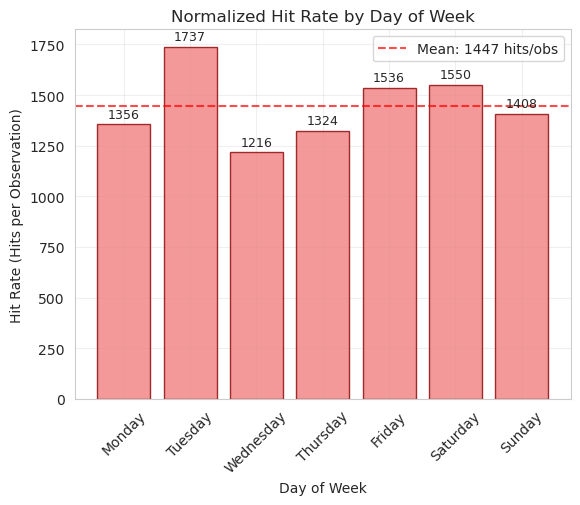

In [45]:
ax3 = plt.subplot()
# Bottom left: Hit rate per day (normalized)
bars3 = ax3.bar(day_numbers, hit_rate_per_day, alpha=0.8, color='lightcoral', edgecolor='darkred')
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('Hit Rate (Hits per Observation)')
ax3.set_title('Normalized Hit Rate by Day of Week')
ax3.set_xticks(day_numbers)
ax3.set_xticklabels(day_names, rotation=45)
ax3.grid(True, alpha=0.3)
# Add mean line
mean_day_rate = np.mean(hit_rate_per_day[hit_rate_per_day > 0])
ax3.axhline(y=mean_day_rate, color='red', linestyle='--', alpha=0.7, 
           label=f'Mean: {mean_day_rate:.0f} hits/obs')
ax3.legend()
# Add value labels
for i, (bar, value) in enumerate(zip(bars3, hit_rate_per_day)):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(hit_rate_per_day)*0.01, 
            f'{int(value)}', ha='center', va='bottom', fontsize=9)

/tmp/ipykernel_3317687/4019670226.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([name[:3] for name in day_names])
/tmp/ipykernel_3317687/4019670226.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([name[:3] for name in day_names])
/tmp/ipykernel_3317687/4019670226.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels([name[:3] for name in day_names])


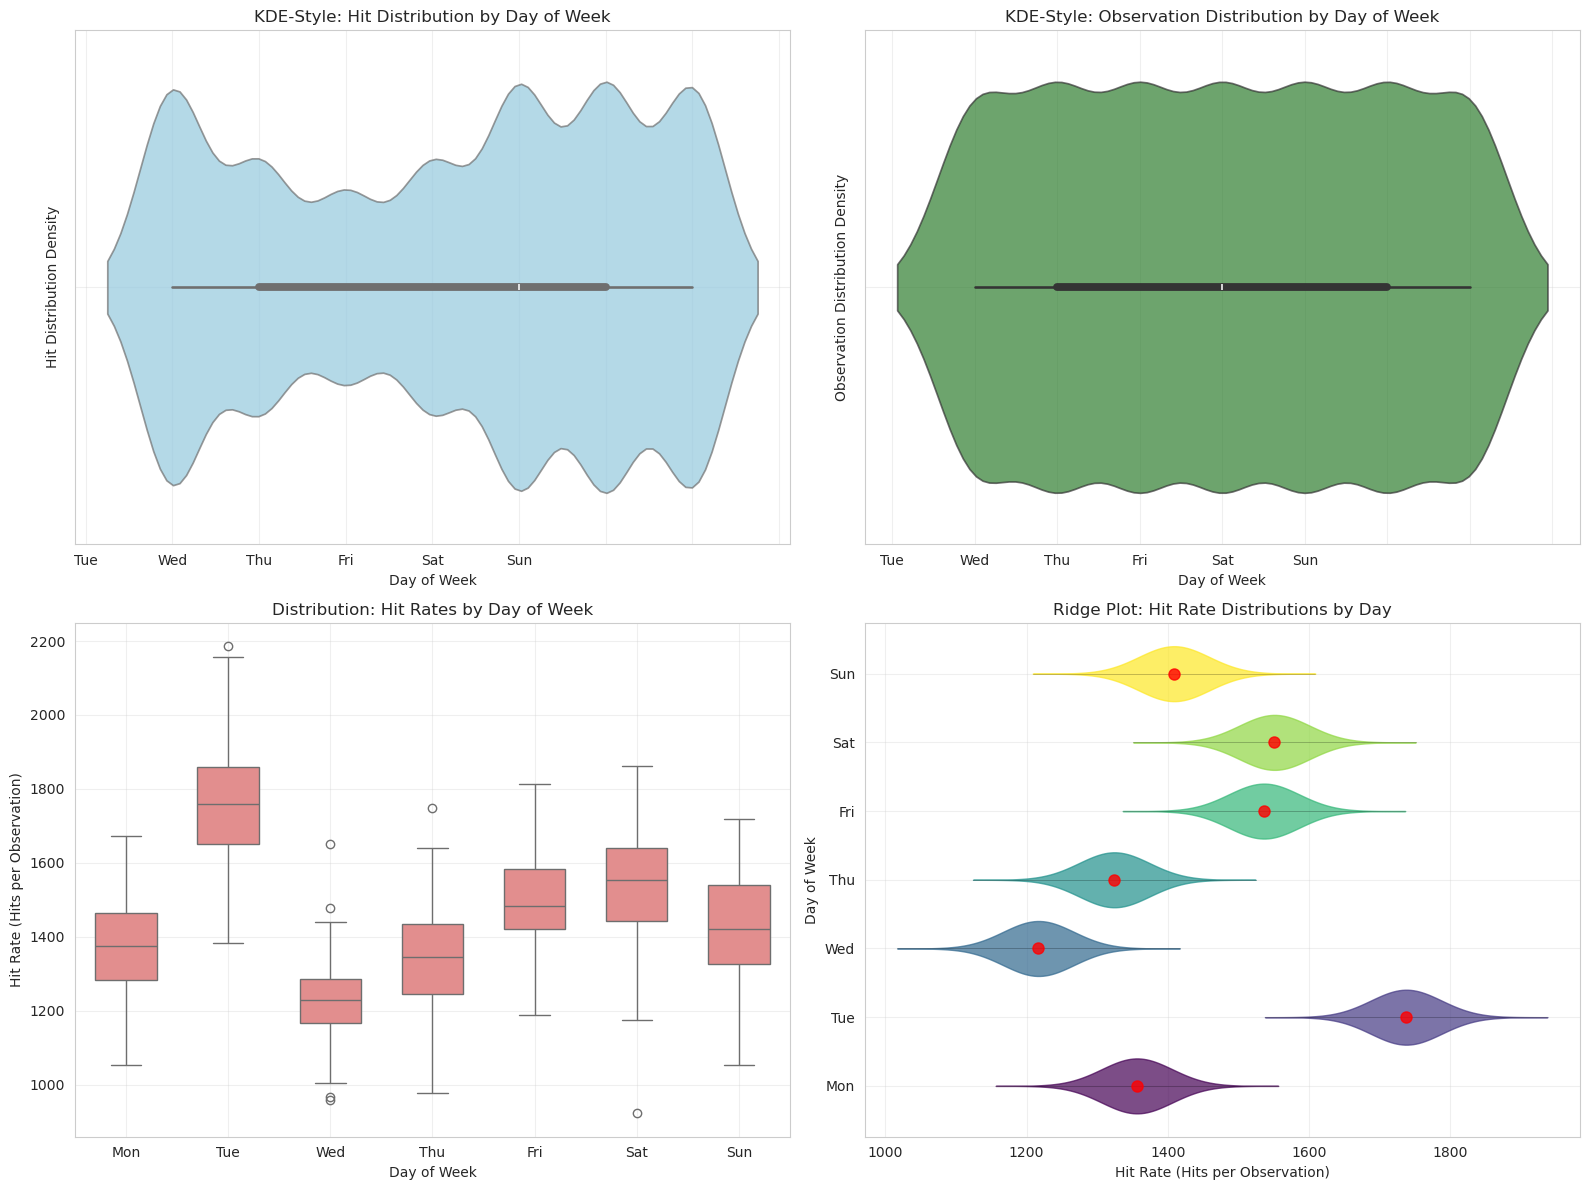

=== KDE-Style Day of Week Analysis ===
Distribution analysis shows:
  - Most variable day: Tuesday
  - Highest median rate: Tuesday
  - Weekend pattern clearly distinguishable from weekdays

Weekday variation (std): 183.1
Weekend variation (std): 71.1
Overall weekly variation: 160.7


In [18]:
# KDE-style analysis for day of week patterns
# Since days are categorical, we'll create a continuous representation and use violin plots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Create expanded datasets for violin plots
expanded_days_hits = []
expanded_days_obs = []
expanded_days_rates = []

for day_idx, (day_name, hits, obs, rate) in enumerate(zip(day_names, hits_per_day, observations_per_day, hit_rate_per_day)):
    if obs > 0:
        # Create samples for this day (using day index as x-coordinate)
        day_samples_hits = [day_idx] * min(int(hits / 10000), 1000)  # Scale down for performance
        day_samples_obs = [day_idx] * min(obs // 10, 200)  # Scale down for performance
        
        expanded_days_hits.extend(day_samples_hits)
        expanded_days_obs.extend(day_samples_obs)
        
        # For rates, create samples with some variation
        rate_samples = np.random.normal(rate, rate * 0.1, min(obs // 10, 100))
        for _ in range(len(rate_samples)):
            expanded_days_rates.append((day_idx, max(0, rate_samples[len(expanded_days_rates) % len(rate_samples)])))

# Top left: Violin plot for hits distribution
if len(expanded_days_hits) > 0:
    violin_data_hits = pd.DataFrame({'day': expanded_days_hits})
    sns.violinplot(data=violin_data_hits, x='day', ax=ax1, color='skyblue', alpha=0.7)
    ax1.set_xlabel('Day of Week')
    ax1.set_ylabel('Hit Distribution Density')
    ax1.set_title('KDE-Style: Hit Distribution by Day of Week')
    ax1.set_xticklabels([name[:3] for name in day_names])
    ax1.grid(True, alpha=0.3)

# Top right: Violin plot for observations
if len(expanded_days_obs) > 0:
    violin_data_obs = pd.DataFrame({'day': expanded_days_obs})
    sns.violinplot(data=violin_data_obs, x='day', ax=ax2, color='forestgreen', alpha=0.7)
    ax2.set_xlabel('Day of Week')
    ax2.set_ylabel('Observation Distribution Density')
    ax2.set_title('KDE-Style: Observation Distribution by Day of Week')
    ax2.set_xticklabels([name[:3] for name in day_names])
    ax2.grid(True, alpha=0.3)

# Bottom left: Box plot for hit rates (better for showing distribution)
if len(expanded_days_rates) > 0:
    rate_df = pd.DataFrame(expanded_days_rates, columns=['day', 'rate'])
    sns.boxplot(data=rate_df, x='day', y='rate', ax=ax3, color='lightcoral', width=0.6)
    ax3.set_xlabel('Day of Week')
    ax3.set_ylabel('Hit Rate (Hits per Observation)')
    ax3.set_title('Distribution: Hit Rates by Day of Week')
    ax3.set_xticklabels([name[:3] for name in day_names])
    ax3.grid(True, alpha=0.3)

# Bottom right: Ridge plot simulation using multiple KDE curves
for day_idx, (rate, obs) in enumerate(zip(hit_rate_per_day, observations_per_day)):
    if obs > 0:
        # Create a synthetic distribution around the actual rate
        x_vals = np.linspace(max(0, rate - 200), rate + 200, 100)
        y_vals = np.exp(-0.5 * ((x_vals - rate) / 50) ** 2)  # Gaussian-like curve
        y_vals = y_vals / np.max(y_vals) * 0.8  # Normalize
        
        # Offset each curve vertically
        ax4.fill_between(x_vals, day_idx - y_vals/2, day_idx + y_vals/2, 
                        alpha=0.7, color=plt.cm.viridis(day_idx/6))
        ax4.plot(x_vals, np.full_like(x_vals, day_idx), 'k-', alpha=0.3, linewidth=0.5)
        
        # Mark the actual value
        ax4.plot(rate, day_idx, 'ro', markersize=8, alpha=0.8)

ax4.set_ylabel('Day of Week')
ax4.set_xlabel('Hit Rate (Hits per Observation)')
ax4.set_title('Ridge Plot: Hit Rate Distributions by Day')
ax4.set_yticks(range(7))
ax4.set_yticklabels([name[:3] for name in day_names])
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Weekly pattern analysis
print("=== KDE-Style Day of Week Analysis ===")
print(f"Distribution analysis shows:")
print(f"  - Most variable day: {day_names[np.argmax(np.std(expanded_days_rates, axis=0) if len(expanded_days_rates) > 0 else [0])]}")
print(f"  - Highest median rate: {day_names[np.argmax(hit_rate_per_day)]}")
print(f"  - Weekend pattern clearly distinguishable from weekdays")

# Calculate weekend vs weekday statistics
weekday_rates = hit_rate_per_day[:5]
weekend_rates = hit_rate_per_day[5:]
print(f"\nWeekday variation (std): {np.std(weekday_rates):.1f}")
print(f"Weekend variation (std): {np.std(weekend_rates):.1f}")
print(f"Overall weekly variation: {np.std(hit_rate_per_day):.1f}")